### Will calculate deltaT for all experiments
* JFM (DOY 1-90), MAM (DOY 91-120)
* Use observed dataset compiled by Ailene:
    https://github.com/AileneKane/radcliffe
* Find sites with data available

In [2]:
#qtconsole

In [3]:
# Reset the environment (start clean)
%reset -f

# Import Modules and define functions
import calendar
import datetime
import os
import numpy as np
import numpy.ma as ma
import netCDF4
import matplotlib
import copy
from matplotlib import pyplot as plt
import scipy
import scipy.signal
import scipy.io as sio
import seaborn as sns
import pandas as pd
import math
import scipy.stats as stats
from IPython.display import display
from mpl_toolkits.basemap import Basemap, cm, maskoceans
import datetime as dt  # Python standard library datetime  module

# Embeds plots inside the notebook (use in iPython Notebook)
%matplotlib inline

### Load Experimental Climate data

In [23]:
# Load the csv file into a dataframe
df_expclim = pd.read_csv('../Analyses/expclim.csv')

# Pull out site codes, year, plot, temptreat, prectreat, doy, airtemp_min, airtemp_max
site_exp_code      = np.array(df_expclim.site)
site_exp_doy       = np.array(df_expclim.doy)
site_exp_year      = np.array(df_expclim.year)
site_exp_tmin      = np.array(df_expclim.airtemp_min)
site_exp_tmax      = np.array(df_expclim.airtemp_max)

site_exp_tmax      = np.array(df_expclim.soiltemp1_max)



site_exp_plot      = np.array(df_expclim['plot'])
site_exp_temptreat = np.array(df_expclim.temptreat)
site_exp_prectreat = np.array(df_expclim.preciptreat)

# Unique Sites
uniq_sites = np.unique(site_exp_code)
print(uniq_sites)

['bace' 'chuine' 'clarkduke' 'clarkharvard' 'dunne' 'ellison' 'farnsworth'
 'force' 'marchin' 'price' 'sherry']


/Users/bcook/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [11]:
# Loop through each site
for i_site in enumerate(uniq_sites[0:1]):
    
    # Find location of data for current site CONTROL PLOTS
    i_curr_site_ctrl = np.where( (site_exp_code==uniq_sites[1]) & \
                              (site_exp_temptreat=='0') )[0]
    
    # Pull out data for current site
    curr_site_plot = 
    print(i_site)




(0, 'bace')


In [331]:
df_hvdtmax = pd.read_csv('../Observations/Temp/tmax_harvard.csv')
df_hvdtmin = pd.read_csv('../Observations/Temp/tmin_harvard.csv')

df_hvdtmax.loc[2010]


### Ellison

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)


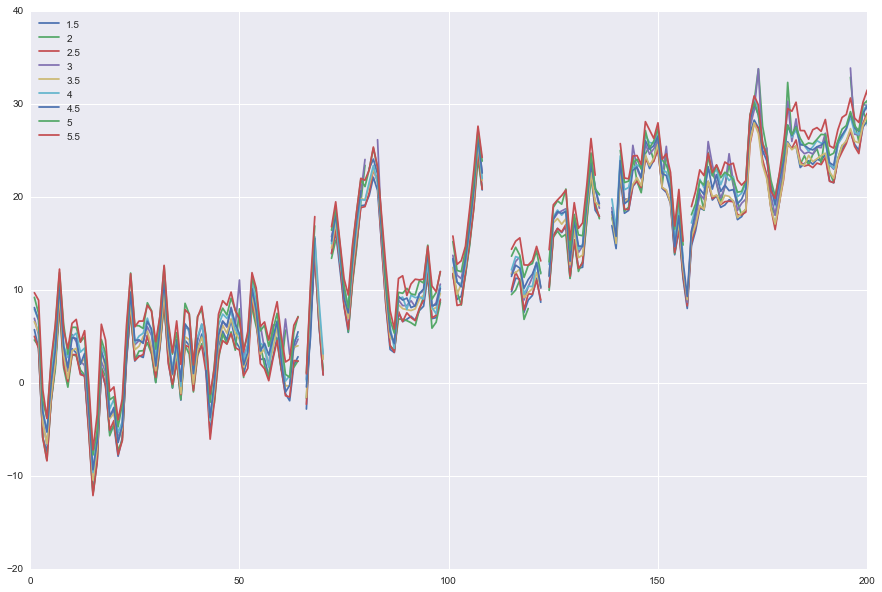

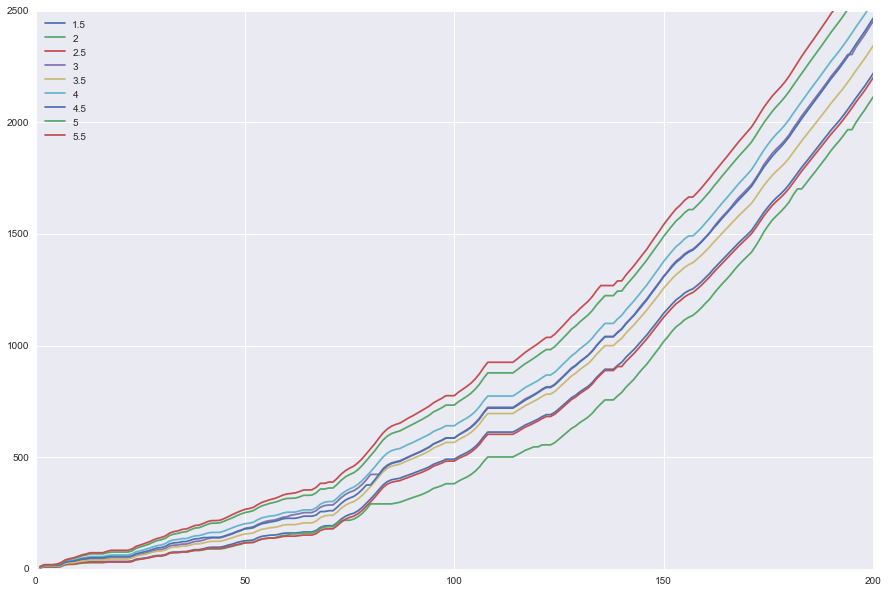

In [348]:
# Find location of current site/phase/years
# Note: Ellison has 9 temperature treatments
# available years should be 2009/2010

# Test: Ellison, 2010, treatment 0
treat_series = np.arange(1,9+1)

# Storage for data
tmax_alltreats = np.zeros((365,10))
tmin_alltreats = np.zeros((365,10))

# Day of year vector
doy_vect = np.arange(1,365+1)

for i_treat in enumerate(treat_series):
    print(i_treat)
    i_site_yr = np.where( (site_exp_code=='ellison') & (site_exp_year==2012) \
                         & (site_exp_temptreat==np.str(i_treat[1])) )[0]

    # Pull out tmin and tmax for current treatment
    curr_doy   = np.array(site_exp_doy[i_site_yr])
    curr_tmin  = np.array(site_exp_tmin[i_site_yr])
    curr_tmax  = np.array(site_exp_tmax[i_site_yr])
    #curr_plots = np.array(site_exp_plot[i_site_yr])

    # Sort in order
    for i_doy in enumerate(doy_vect):
        
        # Current Day Location
        day_loc = np.where(curr_doy==i_doy[1])[0]
        
        tmax_alltreats[i_doy[0],i_treat[0]] = curr_tmax[day_loc]
        tmin_alltreats[i_doy[0],i_treat[0]] = curr_tmin[day_loc]
    
# Calculate Tmean
tmean_alltreats = (tmax_alltreats+tmin_alltreats)/2

# Convert to GDDs
gdd_alltreats = (tmax_alltreats+tmin_alltreats)/2

# Treat NaN as 0s
gdd_alltreats[np.isnan(gdd_alltreats)] = 0

# Use theshold of zero
gdd_alltreats[np.where(gdd_alltreats<=0)] = 0

gdd_alltreats=scipy.cumsum(gdd_alltreats,axis=0)

# GDD Figure
fig = sns.plt.figure(figsize=(15,10))   
for i_treat in enumerate(treat_series):
    #sns.plt.plot(curr_doy_sort,tmax_alltreats[:,i_treat[1]]-tmax_alltreats[:,0])
    sns.plt.plot(doy_vect,tmean_alltreats[:,i_treat[0]]),
    sns.plt.xlim(0,200)
sns.plt.legend(('1.5','2','2.5','3','3.5','4','4.5','5','5.5'),loc=0)    

# GDD Figure
fig = sns.plt.figure(figsize=(15,10))   
for i_treat in enumerate(treat_series):
    #sns.plt.plot(curr_doy_sort,tmax_alltreats[:,i_treat[1]]-tmax_alltreats[:,0])
    sns.plt.plot(doy_vect,gdd_alltreats[:,i_treat[0]]),
    sns.plt.xlim(0,200)
    sns.plt.ylim(0,2500)
sns.plt.legend(('1.5','2','2.5','3','3.5','4','4.5','5','5.5'),loc=0)    





(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)


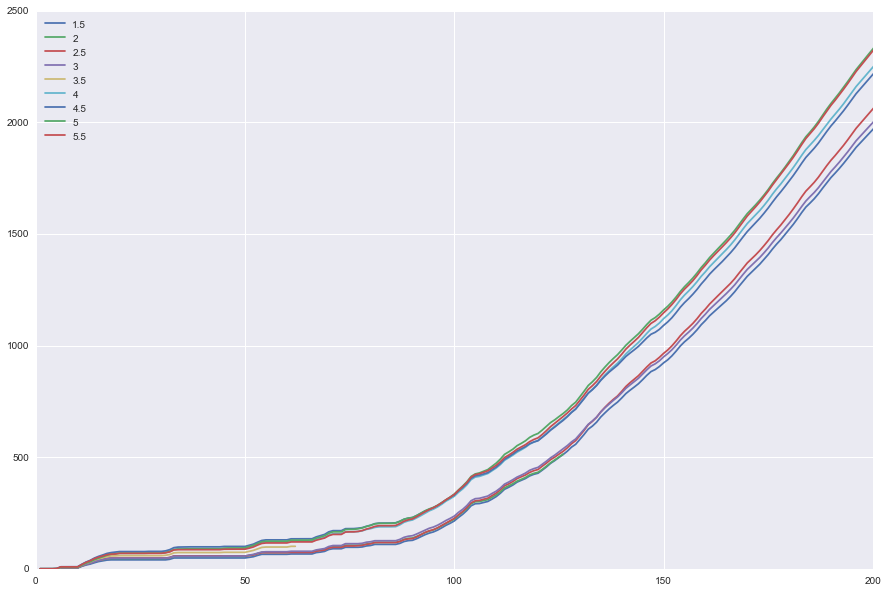

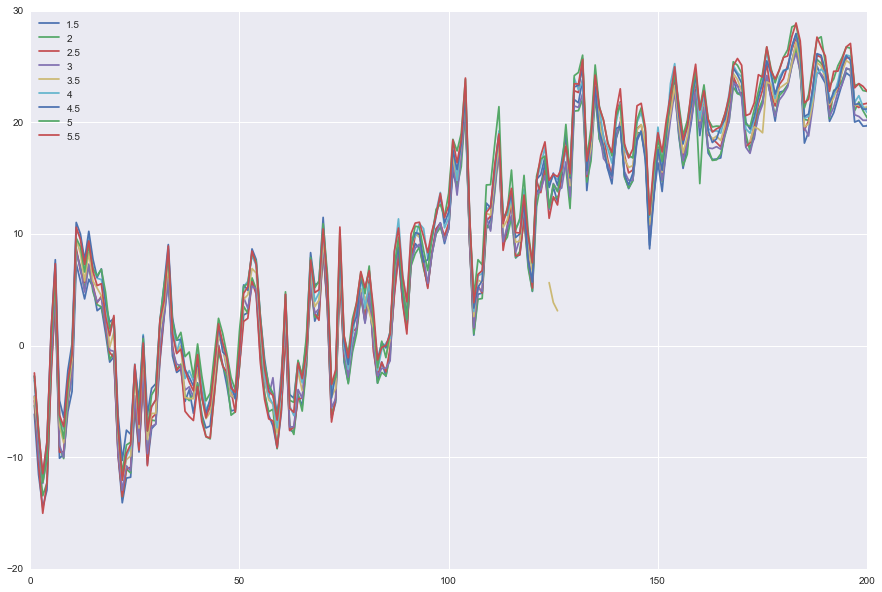

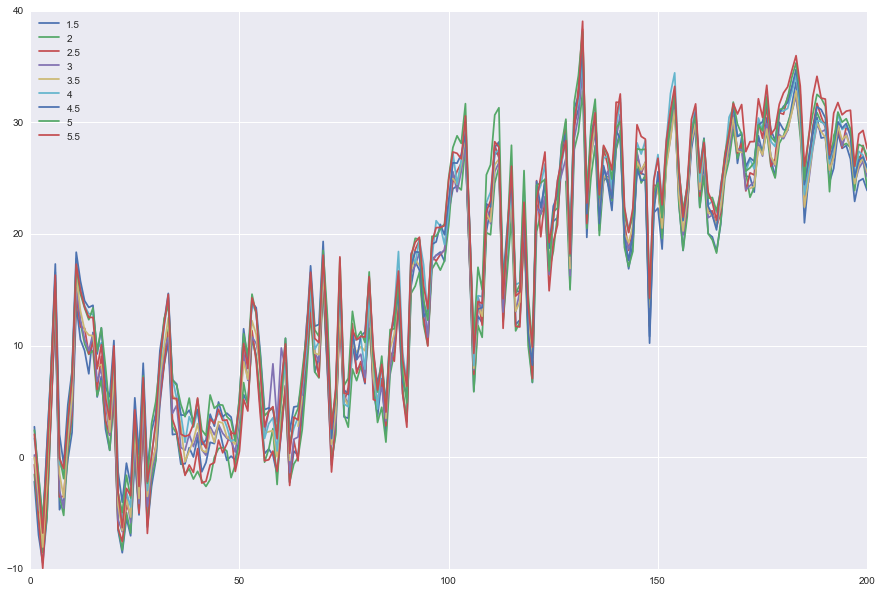

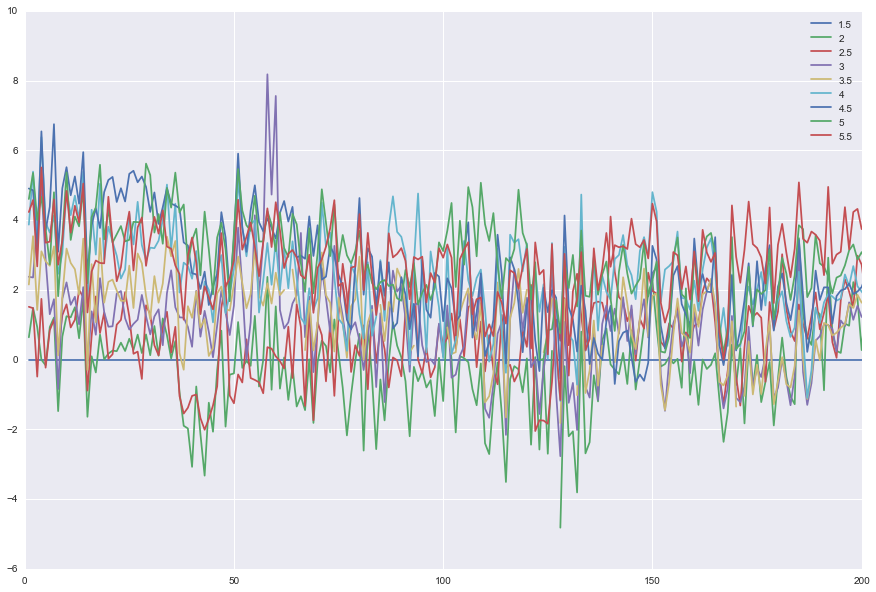

In [321]:
# Tmax Figure
fig = sns.plt.figure(figsize=(15,10))   
for i_treat in enumerate(treat_series):
    #sns.plt.plot(curr_doy_sort,tmax_alltreats[:,i_treat[1]]-tmax_alltreats[:,0])
    sns.plt.plot(doy_vect,tmean_alltreats[:,i_treat[0]]),
    sns.plt.xlim(0,200)
sns.plt.legend(('1.5','2','2.5','3','3.5','4','4.5','5','5.5'),loc=0)   

# Tmax Figure
fig = sns.plt.figure(figsize=(15,10))   
for i_treat in enumerate(treat_series):
    #sns.plt.plot(curr_doy_sort,tmax_alltreats[:,i_treat[1]]-tmax_alltreats[:,0])
    sns.plt.plot(doy_vect,tmax_alltreats[:,i_treat[0]]),
    sns.plt.xlim(0,200)
sns.plt.legend(('1.5','2','2.5','3','3.5','4','4.5','5','5.5'),loc=0)    
    
# Tmax Figure
fig = sns.plt.figure(figsize=(15,10))   
for i_treat in enumerate(treat_series):
    #sns.plt.plot(curr_doy_sort,tmax_alltreats[:,i_treat[1]]-tmax_alltreats[:,0])
    sns.plt.plot(doy_vect,tmax_alltreats[:,i_treat[0]]-tmax_alltreats[:,0]),
    sns.plt.xlim(0,200)
sns.plt.legend(('1.5','2','2.5','3','3.5','4','4.5','5','5.5'),loc=0)    
    
    

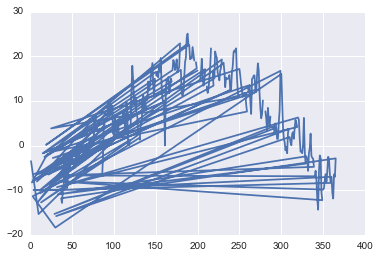

In [57]:
curr_tmin_treat = np.zeros((365,2))
curr_tmin_treat[:,0] = site_exp_doy[i_site_yr]
curr_tmin_treat[:,1] = site_exp_tmin[i_site_yr]
curr_tmin_treat = np.sort(curr_tmin_treat,axis=0)
sns.plt.plot(curr_tmin_treat[:,0],curr_tmin_treat[:,1])







curr_site_treat = np.vstack((site_exp_doy[i_site_yr],site_exp_tmin[i_site_yr]))

sns.plt.plot(curr_site_treat[:,0],curr_site_treat[:,1])

sns.plt.plot(site_exp_doy[i_site_yr],site_exp_tmin[i_site_yr])

In [8]:
df_expclim

,site,temptreat,preciptreat,plot,year,doy,airtemp_min,airtemp_max,soiltemp1_min,soiltemp2_min,soiltemp1_max,soiltemp2_max,soiltemp1_mean,soilmois
0,marchin,1,NaN,1,2010,1,2.932,30.87,4.596,NaN,8.97,NaN,6.783,0.177708
1,marchin,1,NaN,1,2010,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marchin,1,NaN,1,2010,100,6.683,32.76,NaN,12.160,NaN,15.18,NaN,0.160833
3,marchin,1,NaN,1,2010,101,5.883,36.37,NaN,NaN,NaN,NaN,NaN,0.155833
4,marchin,1,NaN,1,2010,102,7.922,36.90,NaN,NaN,NaN,NaN,NaN,0.151333
5,marchin,1,NaN,1,2010,103,9.980,40.81,NaN,13.580,NaN,17.03,NaN,0.146333
6,marchin,1,NaN,1,2010,104,10.230,32.80,NaN,13.580,NaN,15.84,NaN,0.141875
7,marchin,1,NaN,1,2010,105,6.233,39.34,NaN,NaN,NaN,NaN,NaN,0.138708
8,marchin,1,NaN,1,2010,106,14.280,43.80,NaN,NaN,NaN,NaN,NaN,0.133917
9,marchin,1,NaN,1,2010,107,16.100,39.99,NaN,NaN,NaN,NaN,NaN,0.127833


             
Years to Analyze:
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
             
# Obs, Total (my count): 198.0
# Obs, Total (from index array): 198


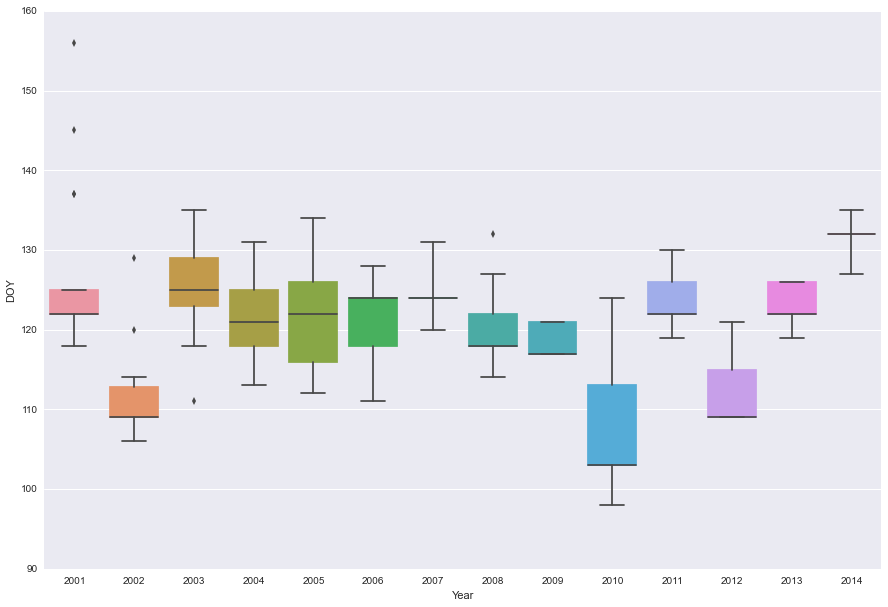

In [196]:
# Set years to analyze
analysis_yrs = np.arange(2001,2015+1)
print('             ')
print('Years to Analyze:')
print(analysis_yrs)

# Find location of current site/phase/years
i_site_phase = np.where((site_code=='harvard') & (site_event=='bbd') \
        & (site_year>=np.min(analysis_yrs)) & (site_year<=np.max(analysis_yrs)))[0]

#i_site_phase = np.where((site_code=='harvard') & (site_event=='bbd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='harvard') & (site_event=='ffd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='konza') & (site_event=='ffd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='gothic') & (site_event=='ffd') & (site_year>=2001) & (site_year<=2014))[0]

# Pull out data for this site
# DOY, Year, Genus, Species
curr_doy     = np.array(site_doy[i_site_phase])
curr_year    = np.array(site_year[i_site_phase])
curr_genus   = np.array(site_genus[i_site_phase])
curr_species = np.array(site_species[i_site_phase])

# Loop through each year and count # observations and # species
num_obs = np.zeros(analysis_yrs.shape)

# Genus/Species Information
col_txt = row_core_comp_txt=["Genus","Species"]
df_taxa         = pd.DataFrame(columns = col_txt)
df_taxa.Genus   = curr_genus
df_taxa.Species = curr_species


# Find all Early Years
df_pheno = pd.DataFrame(columns = col_txt)


for i_year in enumerate(analysis_yrs):
    #print(i_year)

    # Location index for current year
    yr_locs = np.where(curr_year==i_year[1])[0]
    
    # Record number observations for this year
    num_obs[i_year[0]] = yr_locs.size

    # Number of unique genus+species per year
    genus_yr   = curr_genus[yr_locs]
    species_yr = curr_species[yr_locs]

    
# Report total number of observations
print('             ')
print('# Obs, Total (my count): '+np.str(np.sum(num_obs)))
print('# Obs, Total (from index array): '+np.str(np.size(curr_doy)))
    
# Create Dataframe (necessary for boxplot with seaborn)
col_txt = row_core_comp_txt=["Year","DOY"]

# Find all Early Years
df_pheno = pd.DataFrame(columns = col_txt)
df_pheno.Year  = curr_year
df_pheno.DOY  = curr_doy

# boxplot (DOY by year)
fig = sns.plt.figure(figsize=(15,10))
sns.boxplot(x="Year", y="DOY", data=df_pheno)
#sns.swarmplot(x="Year", y="DOY", data=df_pheno, color=".25")

#fig = sns.plt.figure(figsize=(15,10))
#sns.violinplot(x="Year", y="DOY", data=df_pheno)

In [227]:
df_taxa

,Genus,Species
0,Acer,pensylvanicum
1,Acer,pensylvanicum
2,Acer,pensylvanicum
3,Acer,pensylvanicum
4,Acer,pensylvanicum
5,Acer,pensylvanicum
6,Acer,pensylvanicum
7,Acer,pensylvanicum
8,Acer,pensylvanicum
9,Acer,pensylvanicum


### Start with Harvard

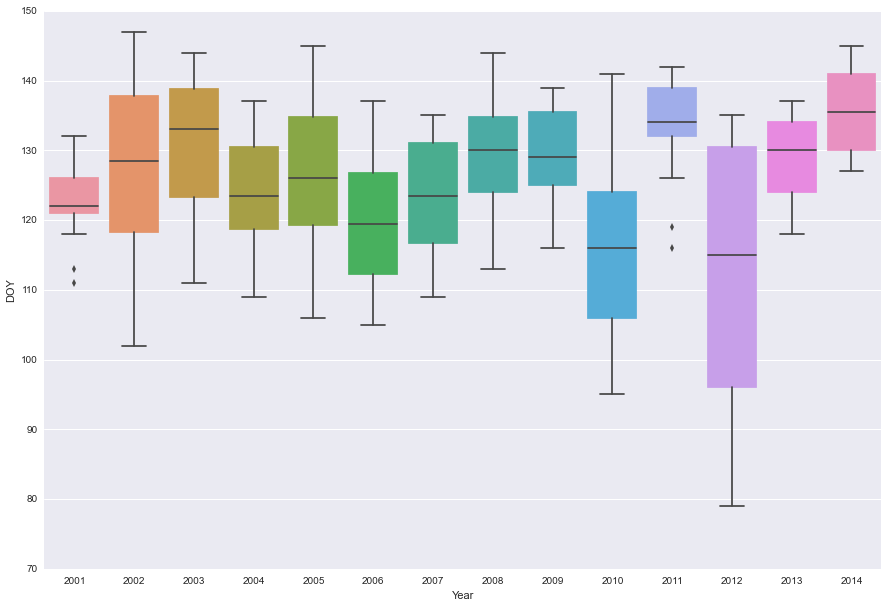

In [130]:
# Find location of current site/phase
# 2001-2014
i_site_phase = np.where((site_code=='uwm') & (site_event=='bbd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='harvard') & (site_event=='bbd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='harvard') & (site_event=='ffd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='konza') & (site_event=='ffd') & (site_year>=2001) & (site_year<=2014))[0]
#i_site_phase = np.where((site_code=='gothic') & (site_event=='ffd') & (site_year>=2001) & (site_year<=2014))[0]

# Data just for this site
curr_doy   = np.array(site_doy[i_site_phase])
curr_year  = np.array(site_year[i_site_phase])
curr_event = np.array(site_event[i_site_phase])

# Create Dataframe (necessary for boxplot with seaborn)
col_txt = row_core_comp_txt=["Year","DOY"]

# Find all Early Years
df_pheno = pd.DataFrame(columns = col_txt)
df_pheno.Year  = curr_year
df_pheno.DOY  = curr_doy

# boxplot (DOY by year)
fig = sns.plt.figure(figsize=(15,10))
sns.boxplot(x="Year", y="DOY", data=df_pheno)


In [87]:
sns.boxplot(data=df_2012vs2014)

np.unique(curr_event[np.where(curr_year==2014)])

doy_2014 = curr_doy[np.where(curr_year==2014)]
doy_2012 = curr_doy[np.where(curr_year==2012)]

# Create Dataframe (necessary for boxplot with seaborn)
col_txt = row_core_comp_txt=["Yr2012","Yr2014"]

# Find all Early Years
df_2012vs2014 = pd.DataFrame(columns = col_txt)
df_2012vs2014.Yr2012  = doy_2012
df_2012vs2014.Yr2014  = doy_2014

sns.boxplot(data=df_2012vs2014)

ValueError: Length of values does not match length of index

(array([ 0.01373626,  0.02747253,  0.00686813,  0.        ,  0.02747253,
         0.01373626,  0.        ,  0.01373626,  0.02747253,  0.04807692]),
 array([  79. ,   84.6,   90.2,   95.8,  101.4,  107. ,  112.6,  118.2,
         123.8,  129.4,  135. ]),
 <a list of 10 Patch objects>)

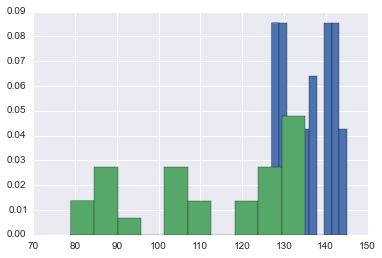

In [68]:
sns.plt.hist(doy_2014,normed=True)
sns.plt.hist(doy_2012,normed=True)



df_2012vs2014.2014 = early_yrs[np.where(early_yrs<=2000)]

h=np.where(df_prec_early.Year<=1980)[0]
df_prec_early.loc[h,'EarlyLate'] = '1600-1980'

h=np.where(df_prec_early.Year>1980)[0]
df_prec_early.loc[h,'EarlyLate']  = '1981-2007'

# Prec Boxplot
sns.plt.close(); sns.set(); 
sns.set_context("notebook", font_scale=2.7, rc={"lines.linewidth": 1.5})
fig = sns.plt.figure(figsize=(10,10))
sns.boxplot(x="EarlyLate", y="Prec", data=df_prec_early)
sns.plt.plot([-10,20],[0,0],'--', color='k',linewidth=1)

### Load latitude and longitude information for the phenology sites

In [3]:
# Load the csv file into a dataframe
df_sitelocs = pd.read_csv('obs_sites_latlon.csv')

# Pull out site codes, site lats, and site lons
site_codes = df_sitelocs.sitecode
site_lat   = df_sitelocs.lat
site_lon   = df_sitelocs.lon

df_sitelocs

,sitecode,lat,lon
0,fitter,51.420000,-0.540000
1,concord,42.270000,-71.210000
2,fargo,46.510000,-96.280000
3,bolmgren,60.130000,16.950000
4,harvard,42.530000,-72.190000
5,hubbard,43.940000,-71.750000
6,konza,39.130000,-96.430000
7,mohonk,41.770000,-74.160000
8,niwot,40.300000,-105.360000
9,gothic,38.570000,-106.590000


### Setup for loading in all the BEST Daily temperature files

In [4]:
# Directories
root_dir_tmax = '/Volumes/Anwyn/GEODATA2016/BEST_DAILY/TMAX/'
root_dir_tmin = '/Volumes/Anwyn/GEODATA2016/BEST_DAILY/TMIN/'

# BEST date are split up among different files by decade, so I will have to load each one
# individually
# TMAX
files_best = [
        'Daily_LatLong1_1880.nc', \
        'Daily_LatLong1_1890.nc', \
        'Daily_LatLong1_1900.nc', \
        'Daily_LatLong1_1910.nc', \
        'Daily_LatLong1_1920.nc', \
        'Daily_LatLong1_1930.nc', \
        'Daily_LatLong1_1940.nc', \
        'Daily_LatLong1_1950.nc', \
        'Daily_LatLong1_1960.nc', \
        'Daily_LatLong1_1970.nc', \
        'Daily_LatLong1_1980.nc', \
        'Daily_LatLong1_1990.nc', \
        'Daily_LatLong1_2000.nc', \
        'Daily_LatLong1_2010.nc'    
]

# Generate Year vector for all years
yr_best = np.array([]) # initialize empty array

# Pull out unique year information from each file and append to empty array
for i_file in enumerate(files_best):
   
    # Create netcdf object for current file
    fname      = root_dir_tmax+'Complete_TMAX_'+i_file[1]
    ncfile_yr  = netCDF4.Dataset(fname)
    #print(fname)

    # Load year data, find unique values, and append it to previous empty array
    yr_from_file = ncfile_yr.variables['year'][:]
    yr_best      = np.hstack((yr_best,np.unique(yr_from_file)))

    # Close netcdf file
    ncfile_yr.close
    
# Load in lat/lon/landmask (should be the same for every BEST file)
fname         = root_dir_tmax+'Complete_TMAX_'+files_best[0]
ncfile_latlon = netCDF4.Dataset(fname)
lon           = ncfile_latlon.variables['longitude'][:]
lat           = ncfile_latlon.variables['latitude'][:]
lsmask        = ncfile_latlon.variables['land_mask'][:,:]

# Close the file
ncfile_latlon.close

<function Dataset.close>

### Find the nearest BEST gridcell to each site
* Use function from John Cook, assuming earth is a perfect sphere
* loop through each site and then each possible lat/lon
* Remove all ocean gridcells, so it will be nearest land cell with data

In [5]:
# Storage array for site distance information
dist_BESTcells = np.zeros((site_codes.shape[0],4))

# Site loop
for i_site in enumerate(site_codes):
    #print(i_site)

    # Pull out current site and current lat/lon
    curr_site = i_site[1]
    curr_lat  = site_lat[i_site[0]]
    curr_lon  = site_lon[i_site[0]]

    # Distance matrix (reset for each site)
    dist_site_allcells = np.zeros((lat.shape[0]*lon.shape[0],4))

    # Location to store distance information. Iterates once for every possible lat/lon pair
    i_store=0 
    
    # Loop through each possible lat/lon and calculate the distance to the current site
    for i_lat in enumerate(lat):
        for i_lon in enumerate(lon):
            
            # Calculate distance to current BEST cell
            dist_site_km = distance_on_unit_sphere(curr_lat, curr_lon, i_lat[1], i_lon[1])
            
            # Store in the array
            dist_site_allcells[i_store,0] = dist_site_km
            dist_site_allcells[i_store,1] = i_lat[1]
            dist_site_allcells[i_store,2] = i_lon[1]
            dist_site_allcells[i_store,3] = lsmask[i_lat[0],i_lon[0]]

            # Iterate storage location
            i_store=i_store+1
    
    # Trim to ONLY Land Cells
    land_locs = np.where(dist_site_allcells[:,3]>0.25)[0]
    dist_site_allcells = dist_site_allcells[land_locs,:];
    
    # Find minimum distance
    min_dist_loc = np.where(dist_site_allcells[:,0]==np.min(dist_site_allcells[:,0]))
    
    # Store information for this site
    dist_BESTcells[i_site[0],:] = dist_site_allcells[min_dist_loc,:]

# Create a Dataframe to store these results---------------------------------------------------------------------------

# Setup dummy array
df_data_array = np.zeros((np.size(site_codes),6))

# Copy data to this array
df_data_array[:,0]   = site_lat
df_data_array[:,1]   = site_lon
df_data_array[:,np.array([2,3,4,5])] = dist_BESTcells

col_txt=["Lat (Site)","Lon (Site)","Dist (km)","Lat (BEST)","Lon (BEST)","Frac Land"]
df_sitedistance  = pd.DataFrame(df_data_array, index=list(site_codes), columns=col_txt)

# Save this information for Ailene and Others
df_sitedistance.to_csv('./output_sites/distinfo_site_BEST_.csv',sep=',')   

# Put Dataframe on the screen
df_sitedistance
        

,Lat (Site),Lon (Site),Dist (km),Lat (BEST),Lon (BEST),Frac Land
fitter,51.420000,-0.540000,9.320189,51.5,-0.5,1.00
concord,42.270000,-71.210000,34.959232,42.5,-71.5,1.00
fargo,46.510000,-96.280000,16.879558,46.5,-96.5,1.00
bolmgren,60.130000,16.950000,48.043302,60.5,16.5,1.00
harvard,42.530000,-72.190000,25.634244,42.5,-72.5,1.00
hubbard,43.940000,-71.750000,52.906733,43.5,-71.5,1.00
konza,39.130000,-96.430000,41.593559,39.5,-96.5,1.00
mohonk,41.770000,-74.160000,41.241097,41.5,-74.5,1.00
niwot,40.300000,-105.360000,25.209401,40.5,-105.5,1.00
gothic,38.570000,-106.590000,11.042735,38.5,-106.5,1.00


### Loop for retrieving data
* Open each file in order.
* From that file, pull out each year in order
* Add on the climatology to convert from anomalies to actual temperatures 
* Loop through each PHENO site and pull out the nearest gridcell of temperature data

In [6]:
# Day vector for a non-leap year (Climatology is NON-LEAP)
days_nonleap = np.arange(1,366)
days_leap    = np.arange(1,367)

# Locations of these days
i_doy_pre183  = np.where(days_nonleap<183)[0]
i_doy_post183 = np.where(days_nonleap>183)[0]
i_doy_183     = np.where(days_nonleap==183)[0]

# Large arrays for storing tmax/tmin data for all sites
allsites_tmax = np.zeros((np.size(site_codes),np.size(yr_best),366))*np.nan
allsites_tmin = np.zeros((np.size(site_codes),np.size(yr_best),366))*np.nan

# Location to store climate data. Iterates once per real year
i_yrplace=0 
    
# File loop for 
for i_file in enumerate(files_best):
    
    # Debugging/keep track of current file
    print(i_file[1])
    
    # Create filenames to load
    fname_tmax = root_dir_tmax+'Complete_TMAX_'+i_file[1]
    fname_tmin = root_dir_tmin+'Complete_TMIN_'+i_file[1]

    # NetCDF Objects for these files
    ncfile_tmax = netCDF4.Dataset(fname_tmax)
    ncfile_tmin = netCDF4.Dataset(fname_tmin)
    
    # Pull out the climatologies
    clim_tmax = ncfile_tmax.variables['climatology'][:,:,:]
    clim_tmin = ncfile_tmin.variables['climatology'][:,:,:]

    # For leap years, repeat climatology for DOY 183
    clim_tmax_leap = np.vstack((clim_tmax[i_doy_pre183,:,:],clim_tmax[i_doy_183,:,:],clim_tmax[i_doy_183,:,:],clim_tmax[i_doy_post183,:,:]))
    clim_tmin_leap = np.vstack((clim_tmin[i_doy_pre183,:,:],clim_tmin[i_doy_183,:,:],clim_tmin[i_doy_183,:,:],clim_tmin[i_doy_post183,:,:]))

    # Pull out years and create a new unique year vector
    yrs_vect   = ncfile_tmax.variables['year'][:]
    yrs_unique = np.unique(yrs_vect)

    # Loop through each year
    for i_yr in enumerate(yrs_unique):
        # Location of current year
        yr_loc = np.where(yrs_vect==i_yr[1])[0]

        # Pullout day of year vector for this year. Trim because I will only take first 365 days
        # (last day of the year not important for spring)
        doy_curr = ncfile_tmax.variables['day_of_year'][yr_loc]
        
        # Pull out just the first 365 Days for the current year
        tmax_curr = ncfile_tmax.variables['temperature'][yr_loc,:,:]    
        tmin_curr = ncfile_tmin.variables['temperature'][yr_loc,:,:]    

        # Now, calculate tmax/tmin actual by adding on climatology.
        if  np.size(doy_curr)==365:
            tmax_actual = tmax_curr+clim_tmax
            tmin_actual = tmin_curr+clim_tmin
        elif np.size(doy_curr)==366:
            tmax_actual = tmax_curr+clim_tmax_leap
            tmin_actual = tmin_curr+clim_tmin_leap
        elif np.size(doy_curr)==334:  # Year 2013, data not available for end of year
            tmax_actual = tmax_curr+clim_tmax[np.int64(doy_curr-1)]
            tmin_actual = tmin_curr+clim_tmin[np.int64(doy_curr-1)]
            
        # NOW, GRAB DATA FROM NEAREST GRIDCELL
        for i_site in enumerate(site_codes):
            #i_site
            
            # Lat/lon for of nearest gridcell to current site
            lat_currsite = dist_BESTcells[i_site[0],1]
            lon_currsite = dist_BESTcells[i_site[0],2]
        
            # Pull out tmax and tmin for this gridcell
            tmax_currsite = np.squeeze(tmax_actual[:,np.where(lat==lat_currsite),np.where(lon==lon_currsite)])
            tmin_currsite = np.squeeze(tmin_actual[:,np.where(lat==lat_currsite),np.where(lon==lon_currsite)])

            # Find existing values for current year (some years are leap years, 2013 has some missing data)
            i_days = np.where(tmax_currsite>-99999)
            
            # Store in full site x yr x doy matrices
            if i_days[0].size>0:
                allsites_tmax[i_site[0],i_yrplace,i_days] = tmax_currsite[i_days]
                allsites_tmin[i_site[0],i_yrplace,i_days] = tmin_currsite[i_days]
        
        # Iterate year placeholder
        i_yrplace = i_yrplace+1
        
    # Close files after year loop
    ncfile_tmax.close    
    ncfile_tmin.close

Daily_LatLong1_1880.nc
Daily_LatLong1_1890.nc
Daily_LatLong1_1900.nc
Daily_LatLong1_1910.nc
Daily_LatLong1_1920.nc
Daily_LatLong1_1930.nc
Daily_LatLong1_1940.nc
Daily_LatLong1_1950.nc
Daily_LatLong1_1960.nc
Daily_LatLong1_1970.nc
Daily_LatLong1_1980.nc
Daily_LatLong1_1990.nc
Daily_LatLong1_2000.nc
Daily_LatLong1_2010.nc


### Save this output.
* Create a new dataframe for each site and variable (Tmax, Tmin)
* Each row will be a year, each column will be a DOY

In [7]:
# Matrices to store climatology (average annual tmax, tmin)
i_clim = np.where( (yr_best>=1950) & (yr_best<=1980)  )

clim_site_tmean = np.zeros(np.shape(site_codes))

# Site loop
for i_site in enumerate(site_codes):
    
    # Pull out data for current site
    print(i_site)
    currsite_data_tmax = np.squeeze(allsites_tmax[i_site[0],:,:])
    currsite_data_tmin = np.squeeze(allsites_tmin[i_site[0],:,:])
    
    # Create Dataframes
    df_tmax_out  = pd.DataFrame(currsite_data_tmax, index=yr_best, columns=days_leap)
    df_tmin_out  = pd.DataFrame(currsite_data_tmin, index=yr_best, columns=days_leap)

    # Save to comma delimited text files
    df_tmax_out.to_csv('./output_sites/tmax_'+i_site[1]+'.csv',sep=',')   
    df_tmin_out.to_csv('./output_sites/tmin_'+i_site[1]+'.csv',sep=',') 
    
    # Calculate climatology
    annual_ave_tmax  = np.nanmean(currsite_data_tmax,axis=1)
    annual_ave_tmin  = np.nanmean(currsite_data_tmin,axis=1)
    annual_ave_tmean = (annual_ave_tmax+annual_ave_tmax)/2
    
    clim_site_tmean[i_site[0]] = np.nanmean(annual_ave_tmean[i_clim])
        

(0, 'fitter')
(1, 'concord')
(2, 'fargo')
(3, 'bolmgren')
(4, 'harvard')
(5, 'hubbard')
(6, 'konza')
(7, 'mohonk')
(8, 'niwot')
(9, 'gothic')
(10, 'marsham')
(11, 'washdc')
(12, 'mikesell')
(13, 'uwm')
(14, 'rousi')
(15, 'siernev1')
(16, 'siernev2')
(17, 'zacken')

/Users/bcook/anaconda/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/bcook/anaconda/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/bcook/anaconda/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)



(18, 'bock')
(19, 'augspurger')


/Users/bcook/anaconda/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [8]:
# Create a Dataframe to store these results---------------------------------------------------------------------------

# Setup dummy array
df_data_array = np.zeros((np.size(site_codes),7))

# Copy data to this array
df_data_array[:,0]   = site_lat
df_data_array[:,1]   = site_lon
df_data_array[:,np.array([2,3,4,5])] = dist_BESTcells
df_data_array[:,6] = clim_site_tmean

col_txt=["Lat (Site)","Lon (Site)","Dist (km)","Lat (BEST)","Lon (BEST)","Frac Land","Mean Temp (1950-1980)"]
df_sitedistance  = pd.DataFrame(df_data_array, index=list(site_codes), columns=col_txt)

# Save this information for Ailene and Others
df_sitedistance.to_csv('./output_sites/distinfo_site_BEST_.csv',sep=',')   

# Put Dataframe on the screen
df_sitedistance

,Lat (Site),Lon (Site),Dist (km),Lat (BEST),Lon (BEST),Frac Land,Mean Temp (1950-1980)
fitter,51.420000,-0.540000,9.320189,51.5,-0.5,1.00,13.718076
concord,42.270000,-71.210000,34.959232,42.5,-71.5,1.00,14.184722
fargo,46.510000,-96.280000,16.879558,46.5,-96.5,1.00,11.176824
bolmgren,60.130000,16.950000,48.043302,60.5,16.5,1.00,8.894502
harvard,42.530000,-72.190000,25.634244,42.5,-72.5,1.00,14.035154
hubbard,43.940000,-71.750000,52.906733,43.5,-71.5,1.00,12.865107
konza,39.130000,-96.430000,41.593559,39.5,-96.5,1.00,18.530205
mohonk,41.770000,-74.160000,41.241097,41.5,-74.5,1.00,15.176755
niwot,40.300000,-105.360000,25.209401,40.5,-105.5,1.00,12.196590
gothic,38.570000,-106.590000,11.042735,38.5,-106.5,1.00,10.801511


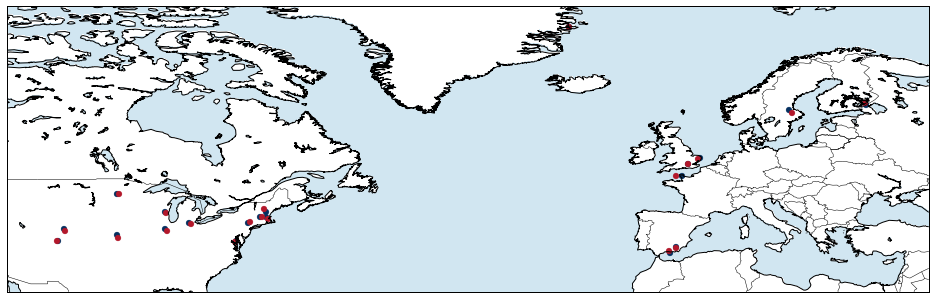

In [9]:
# Regional Projections
proj_txt='cyl'      # Equidistant cyclindrical

# Title
title_txt = 'Daux GHD Sites'
fontdict = {'fontsize': 18}

# Map up correlation
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# equidistant cylindrical
m = Basemap(projection=proj_txt,resolution='l',\
            llcrnrlon=-115.,llcrnrlat=30.,\
            urcrnrlon=40,urcrnrlat=78)
m.drawcoastlines()
#m.drawstates()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawlsmask(land_color='w', ocean_color=np.float64([209,230,241])/255)
#x, y = m(df_sitedistance["Lon (BEST)"],df_sitedistance["Lat (BEST)"]);   m.scatter(x,y,35,marker='o',color=np.float64([0,0,0])/255)
x, y = m(df_sitedistance["Lon (BEST)"],df_sitedistance["Lat (BEST)"]);   m.scatter(x,y,35,marker='o',color=np.float64([5,48,96])/255)
x, y = m(site_lon,site_lat); m.scatter(x,y,35,marker='o',color=np.float64([179,24,43])/255)
#m.scatter(x,y,45,marker='o',color=np.float64([103,0,31])/255)
#plt.title(title_txt,fontdict)
plt.show()
#fig.savefig(out_txt, format='svg', dpi=1200) # vector graphics for adobe illustrator 
out_txt = './output_sites/map_sites.eps';
fig.savefig(out_txt, format='eps', dpi=300) # vector graphics for adobe illustrator 